**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Curso: Inteligencia Artificial**

**Segundo Semestre 2021**

**Profesor: Luis-Alexander Calvo-Valverde**

**Trabajo Práctico:** 04

**Datos de la entrega:** Miércoles 27 de octubre 2021, a más tardar a las 11:59 pm

**Estudiantes:**
- Lindsay Morales Bonilla, 2018077301
- Jose Pablo Salazar Granados, 2018107213





___

# Nota Introductoria
___

Ustedes han sido contratados por la empresa FUTURA para trabajar con dos conjuntos de datos y lograr la mejor predicción posible, dadas ciertas métricas.

Para efectos de dudas o ampliaciones sobre el proyecto, además de lo que se indique en este cuaderno, considere a Luis-Alexánder Calvo-Valverde como su cliente para atender sus consultas.

___

# Parte 1  -  Clasificación (50 puntos)
___

### Considere lo siguiente:
1. Conjunto de datos: mnist_ALL.csv
1. Los atributos corresponden a una imagen de 28x28.
1. El atributo a predecir es label.
1. Proponga al menos tres algoritmos a utilizar
1. Métricas:
    1. Accuracy
    1. f1_score
1. Debe presentar en este cuaderno:
    1. Pre-procesamiento de los datos, explicando las decisiones en cada caso. Observará que en este caso viene bastante preparado
    1. Para cada uno de los algoritmos seleccionados: 
        1. Explicación del algoritmo.
        1. Explicación de la implementación seleccionada y de sus parámetros.
    1. Explicación del diseño experimental por ejecutar. Recuerde que si el algoritmo requiere seleccionar hyperparámetros, hay que dividir en tres conjuntos de datos: Training, Validation, Testing (60%, 20%, 20%). Se le recomienda confirmar con el profesor cuántos y cuáles hyperparámetros validar.
    1. Programación del diseño experimental. 
    1. Tablas de resultados, gráficos y conclusiones de los resultados, recomendando a su contratante cuál algoritmo utilizar, con qué configuración y por qué lo recomienda. 

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

In [ ]:
#The file is not comma separated but is using ";"
imageData = pd.read_csv('mnist_ALL.csv', sep=";")

In [ ]:
# We explore the initial contents
imageData

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Preprocesamiento de datos

In [ ]:
#Checking if there are NaNs
print(imageData.isnull().sum())

print('\nTotal NaNs in dataset:', np.sum(imageData.isnull().sum()))

#Checking if there are outliers
outliersExist = False
for column in imageData.columns:
    if (imageData[column].min() < 0  or imageData[column].max() > 255):
        outliersExist = True
        plt.boxplot(imageData[column])
        plt.show()
if (not outliersExist):
    print('\nThere are no outliers')
        
#Applying MinMaxScaler, even though all data is between 0 and 255, if we scale the data it will converge faster to the solution

columns = imageData.columns.to_list()
columns.remove('label')

scaler = MinMaxScaler()

imageData[columns] = scaler.fit_transform(imageData[columns])

print(imageData.head(10))

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

Total NaNs in dataset: 0

There are no outliers
   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
1      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
2      4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
3      1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
4      9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
5      2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
6      1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
7      3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
8      1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
9      4  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

In [ ]:
# Separación entre train y test
X_train, X_test, y_train, y_test = train_test_split(
    imageData.drop('label', axis=1), imageData['label'], test_size=0.3, random_state=42)

## Aplicación de algoritmos seleccionados

### RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
rfc_prediction = rfc.predict(X_test)

accuracy_rfc = accuracy_score(y_test, rfc_prediction)
f1_rfc = f1_score(y_test, rfc_prediction, average='micro')

print('Random Forest Accuracy:',accuracy_rfc)
print('Random Forest F1:',f1_rfc)

Random Forest Accuracy: 0.9657142857142857
Random Forest F1: 0.9657142857142856


### KNeighborsClassifier

In [ ]:
for i in range(3,6):
    print('\n\n Neighbors used: ', i)
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    neigh_prediction = neigh.predict(X_test)

    accuracy_neigh = accuracy_score(y_test, neigh_prediction)
    f1_neigh = f1_score(y_test, neigh_prediction, average='micro')

    print('KNeighborsClassifier Accuracy:',accuracy_neigh)
    print('KNeighborsClassifier F1:',f1_neigh)



 Neighbors used:  3
KNeighborsClassifier Accuracy: 0.9697619047619047
KNeighborsClassifier F1: 0.9697619047619047


 Neighbors used:  4
KNeighborsClassifier Accuracy: 0.9681428571428572
KNeighborsClassifier F1: 0.9681428571428572


 Neighbors used:  5
KNeighborsClassifier Accuracy: 0.9684285714285714
KNeighborsClassifier F1: 0.9684285714285714


### GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_prediction = gnb.predict(X_test)

accuracy_gnb = accuracy_score(y_test, gnb_prediction)
f1_gnb = f1_score(y_test, gnb_prediction, average='micro')

print('GaussianNB Accuracy:',accuracy_gnb)
print('GaussianNB F1:',f1_gnb)

GaussianNB Accuracy: 0.5506666666666666
GaussianNB F1: 0.5506666666666666


## Conclusiones

___

# Parte 2  -  Clustering  (50 puntos)
___

### Considere lo siguiente:
1. Conjunto de datos: tarjetas.csv
1. Este dataset corresponde a datos de tarjetas de crédito, a partir de los cuales se desea descubrir cuántos grupos (clusters) se podrían encontrar.
1. Proponga al menos dos algoritmos a utilizar
1. Proponga una métrica, la cual debe ser **interna**.
1. Debe presentar en este cuaderno:
    1. Pre-procesamiento de los datos, explicando las decisiones en cada caso. Observará que en este caso viene bastante preparado
    1. Para cada uno de los algoritmos seleccionados: 
        1. Explicación del algoritmo.
        1. Explicación de la implementación seleccionada y de sus parámetros.
    1. Explicación del diseño experimental por ejecutar. En este caso recuerde que es aprendizaje NO Supervisado. Además del númeoro de clusters, se le recomienda confirmar con el profesor cuántos y cuáles hyperparámetros validar. 
    1. Programación del diseño experimental. 
    1. Muestre en una tabla los resultados de la métrica.
    1. Grafique las métrica para ver el criterio del codo.
    1. ¿Cuál es el númermo de cluster que considera mejor describe el conjunto de datos? ¿Cómo defendería su recomendación ante su contratante? (Considere en su respuesta los algoritmos que utilizó)

In [24]:
#The file is not comma separated but is using ";"
cardsData = pd.read_csv('tarjetas.csv', sep=";")

In [25]:
# We explore the initial contents
cardsData

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,1.378155,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,-0.189115
1,0.448154,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,0.125895
2,0.379780,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-0.139097
3,-0.863291,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-0.221929
4,0.403034,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.502292
...,...,...,...,...,...,...,...,...,...,...,...
284802,-2.066656,-4.918215,1.914428,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0.510632,0.250034
284803,-0.738589,0.024330,0.584800,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,-1.221179,-0.395255
284804,-0.557828,-0.296827,0.432454,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0.395652,-0.087371
284805,0.689799,-0.686180,0.392087,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,1.113981,0.546668


## Preprocesamiento

In [26]:
#Checking if there are NaNs
print(cardsData.isnull().sum())

print('\nTotal NaNs in dataset:', np.sum(cardsData.isnull().sum()))

#Checking if there are outliers

#Applying MinMaxScaler

columns = cardsData.columns.to_list()

scaler = MinMaxScaler()

cardsData[columns] = scaler.fit_transform(cardsData[columns])

print(cardsData.head(10))

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
dtype: int64

Total NaNs in dataset: 0
         V1        V2        V3  ...        V9       V10       V11
0  0.313023  0.266815  0.475312  ...  0.737173  0.655066  0.394557
1  0.271796  0.264875  0.453981  ...  0.727794  0.640681  0.446013
2  0.268766  0.270177  0.410603  ...  0.763381  0.644945  0.402727
3  0.213661  0.266803  0.414999  ...  0.711253  0.788492  0.389197
4  0.269796  0.268968  0.490950  ...  0.724243  0.650665  0.507497
5  0.244472  0.268257  0.443190  ...  0.729441  0.658014  0.442749
6  0.305241  0.265324  0.478797  ...  0.731212  0.611202  0.383429
7  0.230111  0.272183  0.483978  ...  0.695620  0.628655  0.417014
8  0.239894  0.267610  0.449275  ...  0.716608  0.661460  0.362697
9  0.242081  0.269325  0.437401  ...  0.715411  0.686076  0.440836

[10 rows x 11 columns]


## Aplicación de algoritmos seleccionados

### Mean Shift

number of estimated clusters : 90


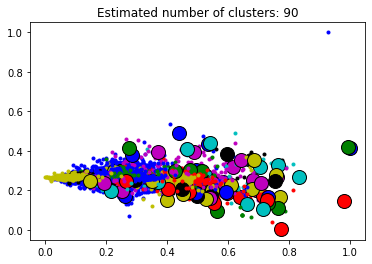

In [27]:
cardsData = cardsData.to_numpy()

bandwidth = estimate_bandwidth(cardsData, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(cardsData)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(cardsData[my_members, 0], cardsData[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [28]:
result = ms

### KMeans

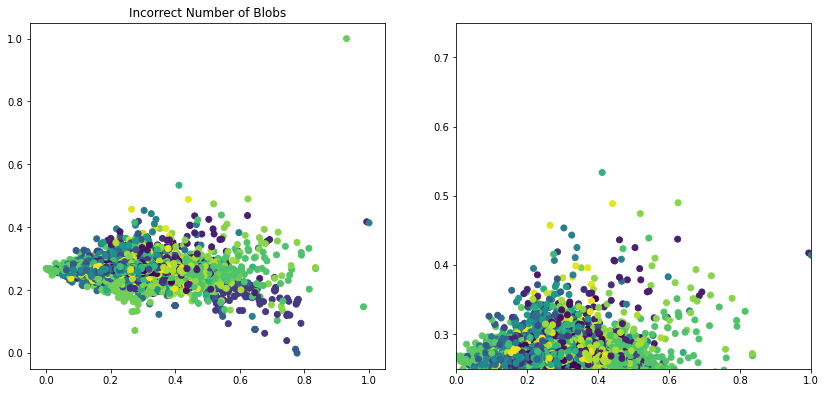

In [31]:
figure(figsize=(14,14))
kmeans = KMeans(n_clusters=80, random_state=0).fit_predict(cardsData)
plt.subplot(221)
plt.scatter(cardsData[:, 0], cardsData[:, 1], c=kmeans)
plt.title("Incorrect Number of Blobs")

ax3 = plt.subplot(222)
ax3.margins(x=0, y=-0.25)   # Values in (-0.5, 0.0) zooms in to center
plt.scatter(cardsData[:, 0], cardsData[:, 1], c=kmeans)
plt.show()

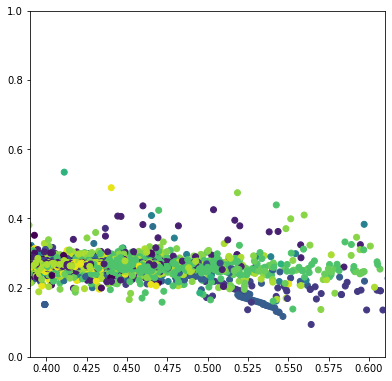

In [32]:
figure(figsize=(14,14))
ax3 = plt.subplot(222)
ax3.margins(x=-0.39, y=0)   # Values in (-0.5, 0.0) zooms in to center
plt.scatter(cardsData[:, 0], cardsData[:, 1], c=kmeans)
plt.show()

## Conclusiones